In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')

In [49]:
data

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1
...,...,...,...,...,...
995,171.0,2.0,0,0,0
996,101.0,2.0,1,1,0
997,260.0,3.0,0,0,0
998,208.0,3.0,0,1,0


In [50]:
data.shape

(1000, 5)

In [51]:
data.buy.value_counts()

0    950
1     50
Name: buy, dtype: int64

<AxesSubplot:>

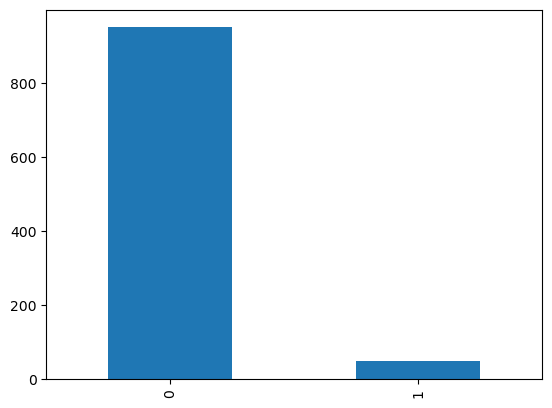

In [52]:
data.buy.value_counts().plot(kind = 'bar')

In [53]:
data.interest_climb.value_counts()

0    605
1    395
Name: interest_climb, dtype: int64

In [54]:
X = data.drop('buy',axis = 1)
y = data['buy']

In [55]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: buy, Length: 1000, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
y_train.value_counts()

0    665
1     35
Name: buy, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logi = LogisticRegression()

In [60]:
logi.fit(X_train,y_train)

LogisticRegression()

In [61]:
preds = logi.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [63]:
confusion_matrix(y_test,preds)

array([[281,   4],
       [ 12,   3]], dtype=int64)

In [64]:
accuracy_score(y_test,preds)

0.9466666666666667

In [65]:
precision_score(y_test,preds)

0.42857142857142855

In [66]:
recall_score(y_test,preds)

0.2

In [67]:
y_test.shape

(300,)

In [68]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       285
           1       0.43      0.20      0.27        15

    accuracy                           0.95       300
   macro avg       0.69      0.59      0.62       300
weighted avg       0.93      0.95      0.94       300



# SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled , Y_resampled = smote.fit_resample(X_train,y_train)

In [70]:
X_resampled.shape

(1330, 4)

In [71]:
Y_resampled.value_counts()

0    665
1    665
Name: buy, dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression

smote_model = LogisticRegression(random_state=42)

smote_model.fit(X_resampled,Y_resampled)

LogisticRegression(random_state=42)

In [74]:
y_pred = smote_model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       285
           1       0.25      0.60      0.35        15

    accuracy                           0.89       300
   macro avg       0.61      0.75      0.65       300
weighted avg       0.94      0.89      0.91       300



In [77]:
X_resampled[X_resampled.duplicated()]

,time_on_page,pages_viewed,interest_ski,interest_climb
29,164.0,2.0,0,1
32,157.0,2.0,0,0
111,175.0,2.0,0,0
114,143.0,2.0,0,1
120,101.0,2.0,0,0
...,...,...,...,...
1145,260.0,3.0,1,1
1167,196.0,4.0,0,1
1236,260.0,3.0,1,1
1290,260.0,3.0,1,1


# Threshold adjustment on smote

In [81]:
prediction = smote_model.predict_proba(X_test)

prediction

array([[4.93439089e-01, 5.06560911e-01],
       [9.95199824e-01, 4.80017642e-03],
       [9.21733583e-01, 7.82664174e-02],
       [9.83760418e-01, 1.62395823e-02],
       [8.94389187e-01, 1.05610813e-01],
       [8.94984517e-01, 1.05015483e-01],
       [9.93743942e-01, 6.25605761e-03],
       [9.99320951e-01, 6.79049354e-04],
       [9.99096710e-01, 9.03289949e-04],
       [9.99523854e-01, 4.76146021e-04],
       [7.89944060e-01, 2.10055940e-01],
       [9.84551737e-01, 1.54482631e-02],
       [9.87174047e-01, 1.28259529e-02],
       [9.93743942e-01, 6.25605761e-03],
       [9.92992725e-01, 7.00727514e-03],
       [9.89389104e-01, 1.06108956e-02],
       [9.71922053e-01, 2.80779475e-02],
       [9.88102745e-01, 1.18972552e-02],
       [9.99844741e-01, 1.55258963e-04],
       [9.88342473e-01, 1.16575269e-02],
       [9.73438416e-01, 2.65615842e-02],
       [9.79553848e-01, 2.04461516e-02],
       [9.72093965e-01, 2.79060350e-02],
       [9.01364950e-01, 9.86350505e-02],
       [9.999822

In [88]:
prediction_bin = prediction[:,1] >= 0.4

prediction_bin

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [89]:
print(classification_report(y_test,prediction_bin))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       285
           1       0.22      0.60      0.32        15

    accuracy                           0.87       300
   macro avg       0.60      0.74      0.63       300
weighted avg       0.94      0.87      0.90       300



# Threshold adjustment on OG data

In [90]:
prediction = logi.predict_proba(X_test)

prediction

array([[8.84317738e-01, 1.15682262e-01],
       [9.99052080e-01, 9.47920077e-04],
       [9.90028566e-01, 9.97143447e-03],
       [9.95181573e-01, 4.81842750e-03],
       [9.90270851e-01, 9.72914940e-03],
       [9.86146559e-01, 1.38534415e-02],
       [9.98753630e-01, 1.24637047e-03],
       [9.99533938e-01, 4.66062107e-04],
       [9.99830536e-01, 1.69463977e-04],
       [9.99775226e-01, 2.24774091e-04],
       [9.68435224e-01, 3.15647762e-02],
       [9.96817107e-01, 3.18289301e-03],
       [9.98986468e-01, 1.01353212e-03],
       [9.98753630e-01, 1.24637047e-03],
       [9.98598536e-01, 1.40146394e-03],
       [9.97845916e-01, 2.15408400e-03],
       [9.97697010e-01, 2.30299046e-03],
       [9.99062720e-01, 9.37279640e-04],
       [9.99972623e-01, 2.73769581e-05],
       [9.97624974e-01, 2.37502571e-03],
       [9.97828059e-01, 2.17194123e-03],
       [9.95735617e-01, 4.26438254e-03],
       [9.96710289e-01, 3.28971097e-03],
       [9.90996908e-01, 9.00309214e-03],
       [9.999923

In [97]:
prediction_bin = prediction[:,1] >= 0.4

prediction_bin

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [98]:
print(classification_report(y_test,prediction_bin))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.40      0.27      0.32        15

    accuracy                           0.94       300
   macro avg       0.68      0.62      0.65       300
weighted avg       0.93      0.94      0.94       300



# Class weight adjustment

In [114]:
model_cw = LogisticRegression(class_weight={0:0.8,1:10}, random_state=42)

model_cw.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.8, 1: 10}, random_state=42)

In [115]:
y_pred1 = model_cw.predict(X_test)

y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       285
           1       0.32      0.60      0.42        15

    accuracy                           0.92       300
   macro avg       0.65      0.77      0.69       300
weighted avg       0.95      0.92      0.93       300

